In [23]:
import sys  
sys.path.insert(0, '/Users/szczekulskij/side_projects/research_projects/tomography-reconstruction-CNN')

import numpy as np
import pandas as pd
from src.mock_dataset_generator import create_dataset #, generate_polygon, generate_polygon_subroutine
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
images_list, sinograms_list, angles_list = create_dataset(10, single_side_size = 6, img_size = 128)

So far created 0 out of 10 elements


In [25]:
def backproject(sinogram, theta):
    """Backprojection function. 
    inputs:  sinogram - [n x m] numpy array where n is the number of projections and m the number of angles
             theta - vector of length m denoting the angles represented in the sinogram
    output: backprojArray - [n x n] backprojected 2-D numpy array"""

    imageLen = sinogram.shape[0] #sinogram : [n x m] , so imageLen = n(height)
    reconMatrix = np.zeros((imageLen, imageLen)) 
    
    x = np.arange(imageLen)-imageLen/2 
    y = x.copy()
    X, Y = np.meshgrid(x, y) 

    plt.ion() 
    fig2, ax = plt.subplots() 
    im = plt.imshow(reconMatrix, cmap='gray') 

    theta = theta*np.pi/180 
    numAngles = len(theta)

    for n in range(numAngles):
        Xrot = X*np.sin(theta[n])-Y*np.cos(theta[n]) 
        XrotCor = np.round(Xrot+imageLen/2) 
                                            
        XrotCor = XrotCor.astype('int') 
        projMatrix = np.zeros((imageLen, imageLen)) 
        m0, m1 = np.where((XrotCor >= 0) & (XrotCor <= (imageLen-1))) 
                                                                      

        s = sinogram[:,n] 
        projMatrix[m0, m1] = s[XrotCor[m0, m1]] 
        reconMatrix += projMatrix
        im.set_data(Image.fromarray((reconMatrix-np.min(reconMatrix))/np.ptp(reconMatrix)*255)) 
                                                                                                
        ax.set_title('Theta = %.2f degrees' % (theta[n]*180/np.pi))
        fig2.canvas.draw()
        fig2.canvas.flush_events()
         
    plt.close()
    plt.ioff()
    backprojArray = np.flipud(reconMatrix) 
    return backprojArray


In [26]:
image = images_list[0]
sinogram = sinograms_list[0]

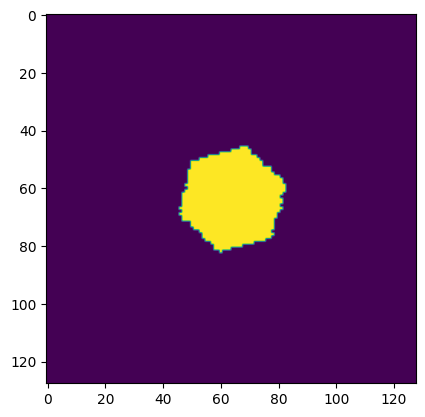

In [27]:
plt.imshow(image)

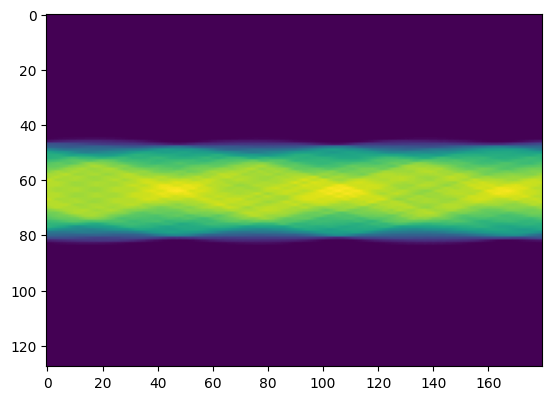

In [28]:
plt.imshow(sinogram)

In [ ]:
theta = np.linspace(0, 179, 180)
plt.imshow(backproject(sinogram, theta))